In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\Projects\Forest Fire\Notebook\data\CA_Weather_Fire_Dataset_1984-2025.csv")

In [8]:
df

,DATE,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,FIRE_START_DAY,YEAR,TEMP_RANGE,WIND_TEMP_RATIO,MONTH,SEASON,LAGGED_PRECIPITATION,LAGGED_AVG_WIND_SPEED,DAY_OF_YEAR
0,1984-01-01,0.0,79.0,51.0,4.70,False,1984,28.0,0.059494,1,Winter,0.0,4.700000,1
1,1984-01-02,0.0,71.0,46.0,5.59,False,1984,25.0,0.078732,1,Winter,0.0,5.145000,2
2,1984-01-03,0.0,70.0,47.0,5.37,False,1984,23.0,0.076714,1,Winter,0.0,5.220000,3
3,1984-01-04,0.0,76.0,45.0,4.70,False,1984,31.0,0.061842,1,Winter,0.0,5.090000,4
4,1984-01-05,0.0,74.0,49.0,5.14,False,1984,25.0,0.069459,1,Winter,0.0,5.100000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14983,2025-01-08,0.0,73.0,53.0,10.51,False,2025,20.0,0.143973,1,Winter,0.0,6.485714,8
14984,2025-01-09,0.0,68.0,46.0,4.92,False,2025,22.0,0.072353,1,Winter,0.0,6.550000,9
14985,2025-01-10,0.0,70.0,46.0,3.58,False,2025,24.0,0.051143,1,Winter,0.0,6.327143,10
14986,2025-01-11,0.0,66.0,46.0,NaN,False,2025,20.0,NaN,1,Winter,0.0,6.561667,11


In [9]:
df.rename(columns={'FIRE_START_DAY':'Fire_Occured'},inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14988 entries, 0 to 14987
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATE                   14988 non-null  object 
 1   PRECIPITATION          14987 non-null  float64
 2   MAX_TEMP               14987 non-null  float64
 3   MIN_TEMP               14987 non-null  float64
 4   AVG_WIND_SPEED         14976 non-null  float64
 5   Fire_Occured           14988 non-null  bool   
 6   YEAR                   14988 non-null  int64  
 7   TEMP_RANGE             14987 non-null  float64
 8   WIND_TEMP_RATIO        14976 non-null  float64
 9   MONTH                  14988 non-null  int64  
 10  SEASON                 14988 non-null  object 
 11  LAGGED_PRECIPITATION   14988 non-null  float64
 12  LAGGED_AVG_WIND_SPEED  14988 non-null  float64
 13  DAY_OF_YEAR            14988 non-null  int64  
dtypes: bool(1), float64(8), int64(3), object(2)
memory usa

In [ ]:
df.drop(columns={'DATE','DAY_OF_YEAR'},inplace=True)

In [14]:
df.head()

,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,Fire_Occured,YEAR,TEMP_RANGE,WIND_TEMP_RATIO,MONTH,SEASON,LAGGED_PRECIPITATION,LAGGED_AVG_WIND_SPEED,DAY
0,0.0,79.0,51.0,4.70,False,1984,28.0,0.059494,1,Winter,0.0,4.700,1
1,0.0,71.0,46.0,5.59,False,1984,25.0,0.078732,1,Winter,0.0,5.145,2
2,0.0,70.0,47.0,5.37,False,1984,23.0,0.076714,1,Winter,0.0,5.220,3
3,0.0,76.0,45.0,4.70,False,1984,31.0,0.061842,1,Winter,0.0,5.090,4
4,0.0,74.0,49.0,5.14,False,1984,25.0,0.069459,1,Winter,0.0,5.100,5


In [15]:
df.isnull().sum()

PRECIPITATION             1
MAX_TEMP                  1
MIN_TEMP                  1
AVG_WIND_SPEED           12
Fire_Occured              0
YEAR                      0
TEMP_RANGE                1
WIND_TEMP_RATIO          12
MONTH                     0
SEASON                    0
LAGGED_PRECIPITATION      0
LAGGED_AVG_WIND_SPEED     0
DAY                       0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.nunique()

PRECIPITATION             184
MAX_TEMP                   57
MIN_TEMP                   44
AVG_WIND_SPEED             89
Fire_Occured                2
YEAR                       42
TEMP_RANGE                 39
WIND_TEMP_RATIO          1660
MONTH                      12
SEASON                      4
LAGGED_PRECIPITATION      994
LAGGED_AVG_WIND_SPEED    1523
DAY                        31
dtype: int64

In [19]:
df['MAX_TEMP']=(df['MAX_TEMP']-32)*5/9
df['MIN_TEMP']=(df['MAX_TEMP']-32)*5/9

In [20]:
df2=df.copy()

In [21]:
df.loc[df["Fire_Occured"] == False, "Fire_Occured"] = 0
df.loc[df["Fire_Occured"] == True,  "Fire_Occured"] = 1

C:\Users\Asus\AppData\Local\Temp\ipykernel_24852\1557517729.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df["Fire_Occured"] == False, "Fire_Occured"] = 0


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRECIPITATION,14976.0,0.032338,0.179607,0.000000,0.000000,0.000000,0.000000,4.530000
MAX_TEMP,14976.0,21.411629,4.034438,10.000000,18.333333,21.111111,23.888889,41.111111
MIN_TEMP,14976.0,-5.882428,2.241355,-12.222222,-7.592593,-6.049383,-4.506173,5.061728
AVG_WIND_SPEED,14976.0,7.435098,2.129985,1.790000,6.040000,7.160000,8.500000,26.170000
YEAR,14976.0,2004.006010,11.837186,1984.000000,1994.000000,2004.000000,2014.000000,2025.000000
TEMP_RANGE,14976.0,14.041266,5.996128,2.000000,10.000000,12.000000,17.000000,41.000000
WIND_TEMP_RATIO,14976.0,0.107019,0.035630,0.023553,0.085238,0.102222,0.120462,0.459123
MONTH,14976.0,6.518096,3.449663,1.000000,4.000000,7.000000,10.000000,12.000000
LAGGED_PRECIPITATION,14976.0,0.226366,0.648934,0.000000,0.000000,0.000000,0.060000,8.180000
LAGGED_AVG_WIND_SPEED,14976.0,7.434007,1.384969,3.227143,6.518571,7.478571,8.278571,13.932857


In [23]:
df['Fire_Occured']=pd.to_numeric(df['Fire_Occured'],errors='coerce')

In [24]:
cat=[]
num=[]

for c in df.columns:
    if df[c].dtype==object:
        cat.append(c)
    else:
        num.append(c)

In [25]:
num

['PRECIPITATION',
 'MAX_TEMP',
 'MIN_TEMP',
 'AVG_WIND_SPEED',
 'Fire_Occured',
 'YEAR',
 'TEMP_RANGE',
 'WIND_TEMP_RATIO',
 'MONTH',
 'LAGGED_PRECIPITATION',
 'LAGGED_AVG_WIND_SPEED',
 'DAY']

In [26]:
cat

['SEASON']

EDA

Fire_Occured
False    66.806891
True     33.193109
Name: proportion, dtype: float64


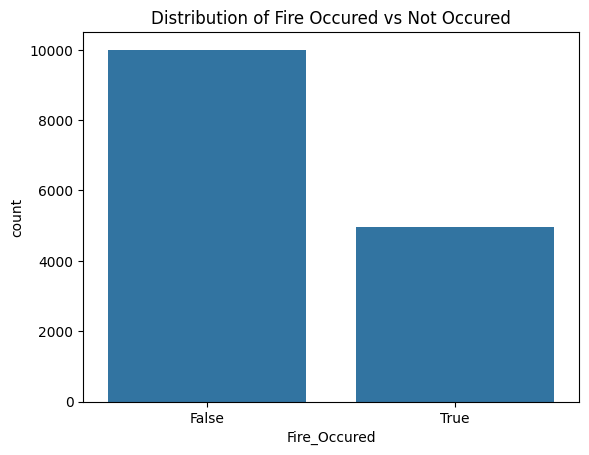

In [27]:
print(df2['Fire_Occured'].value_counts(normalize=True)*100)
sns.countplot(data=df2,x='Fire_Occured')
plt.title('Distribution of Fire Occured vs Not Occured')
plt.show()

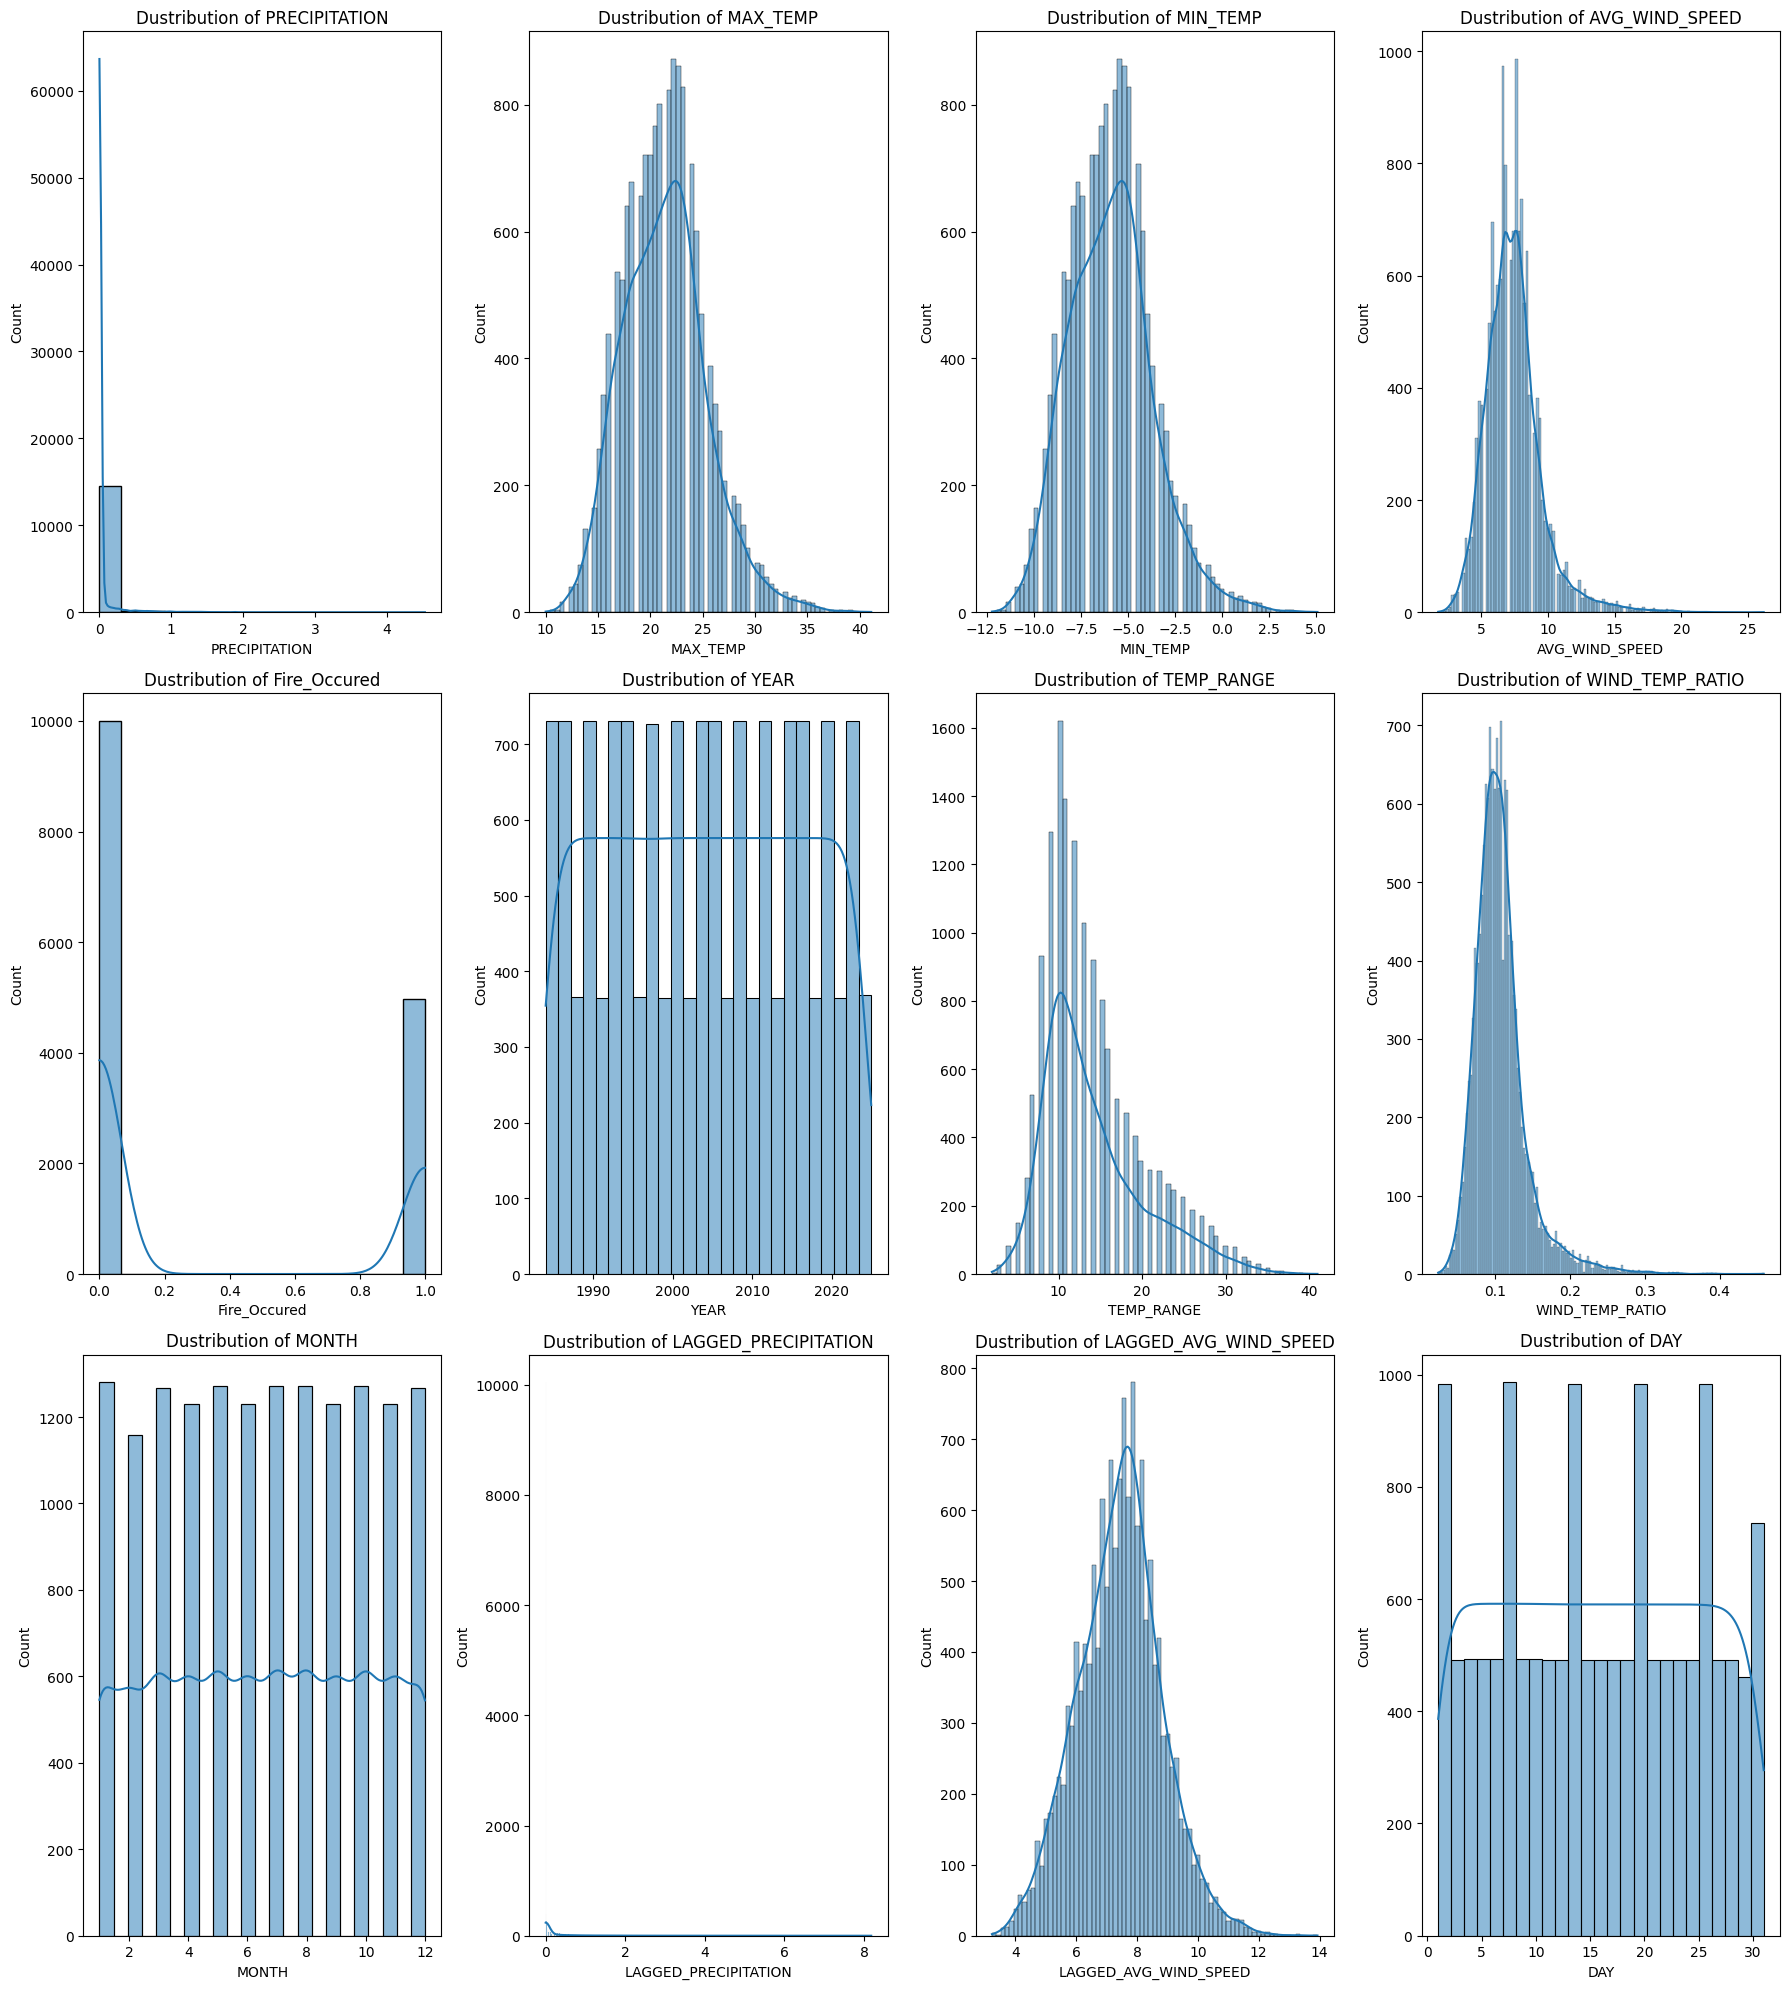

In [28]:
plt.figure(figsize=(18,20))
for i,c in enumerate(num):
    plt.subplot(3,4,i+1)
    sns.histplot(data=df2,x=c,kde=True)
    plt.title(f"Dustribution of {c}")
plt.tight_layout()
plt.show()

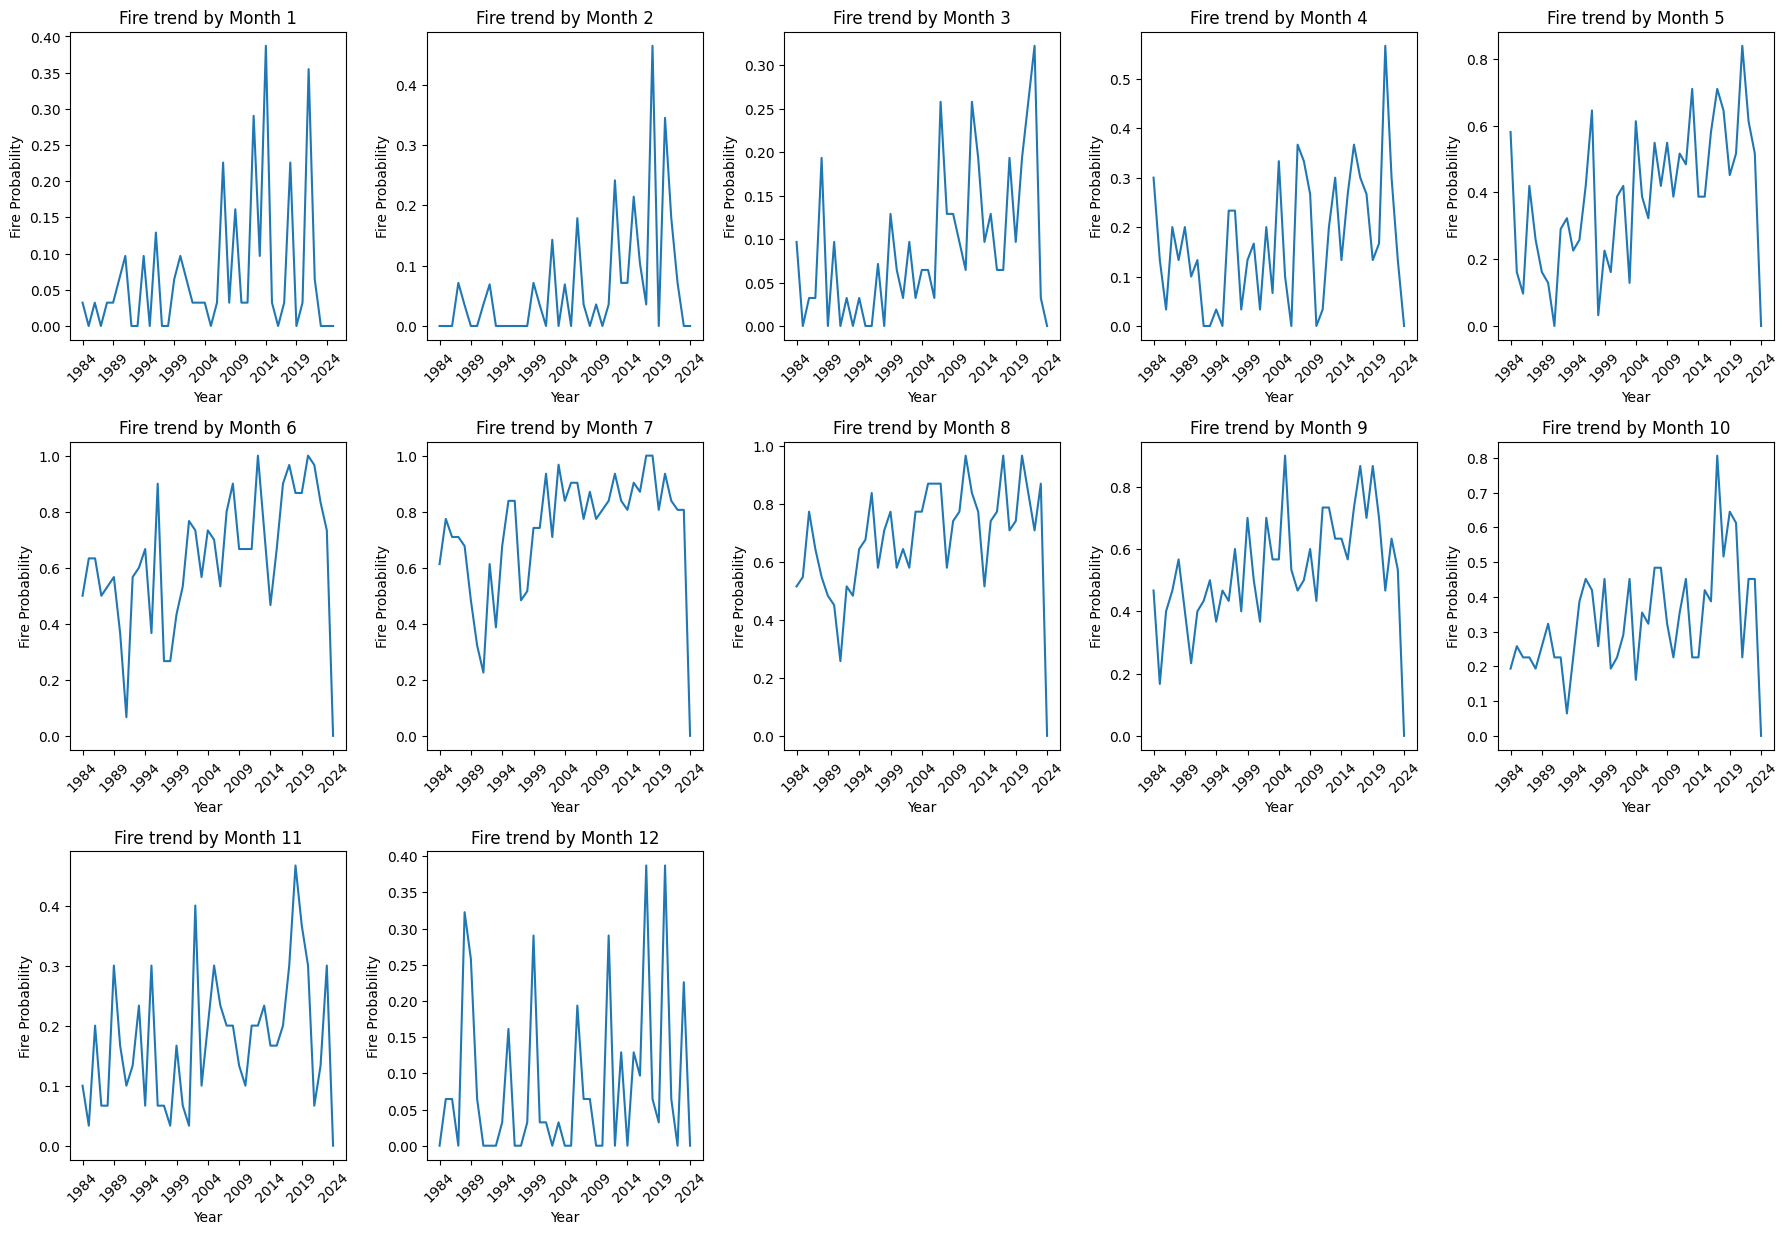

In [29]:
Annual_Fire=pd.pivot_table(df,index='YEAR',columns='MONTH',values='Fire_Occured',aggfunc='mean')
plt.figure(figsize=(18,20))
for i,c in enumerate(Annual_Fire):
    plt.subplot(5,5,i+1)
    sns.lineplot(x=Annual_Fire.index,y=Annual_Fire[c])
    plt.title(f"Fire trend by Month {c}")
    plt.xticks(Annual_Fire.index[::5],rotation=45)
    plt.xlabel('Year')
    plt.ylabel("Fire Probability")
plt.tight_layout()
plt.show()

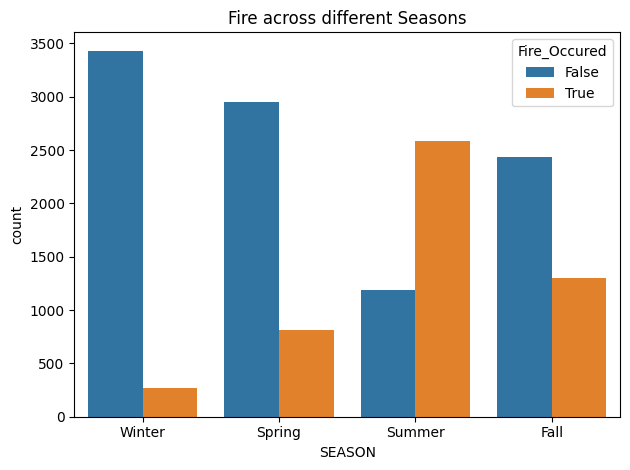

In [30]:
sns.countplot(x='SEASON',hue='Fire_Occured',data=df2)
plt.title("Fire across different Seasons")
plt.tight_layout()
plt.show()

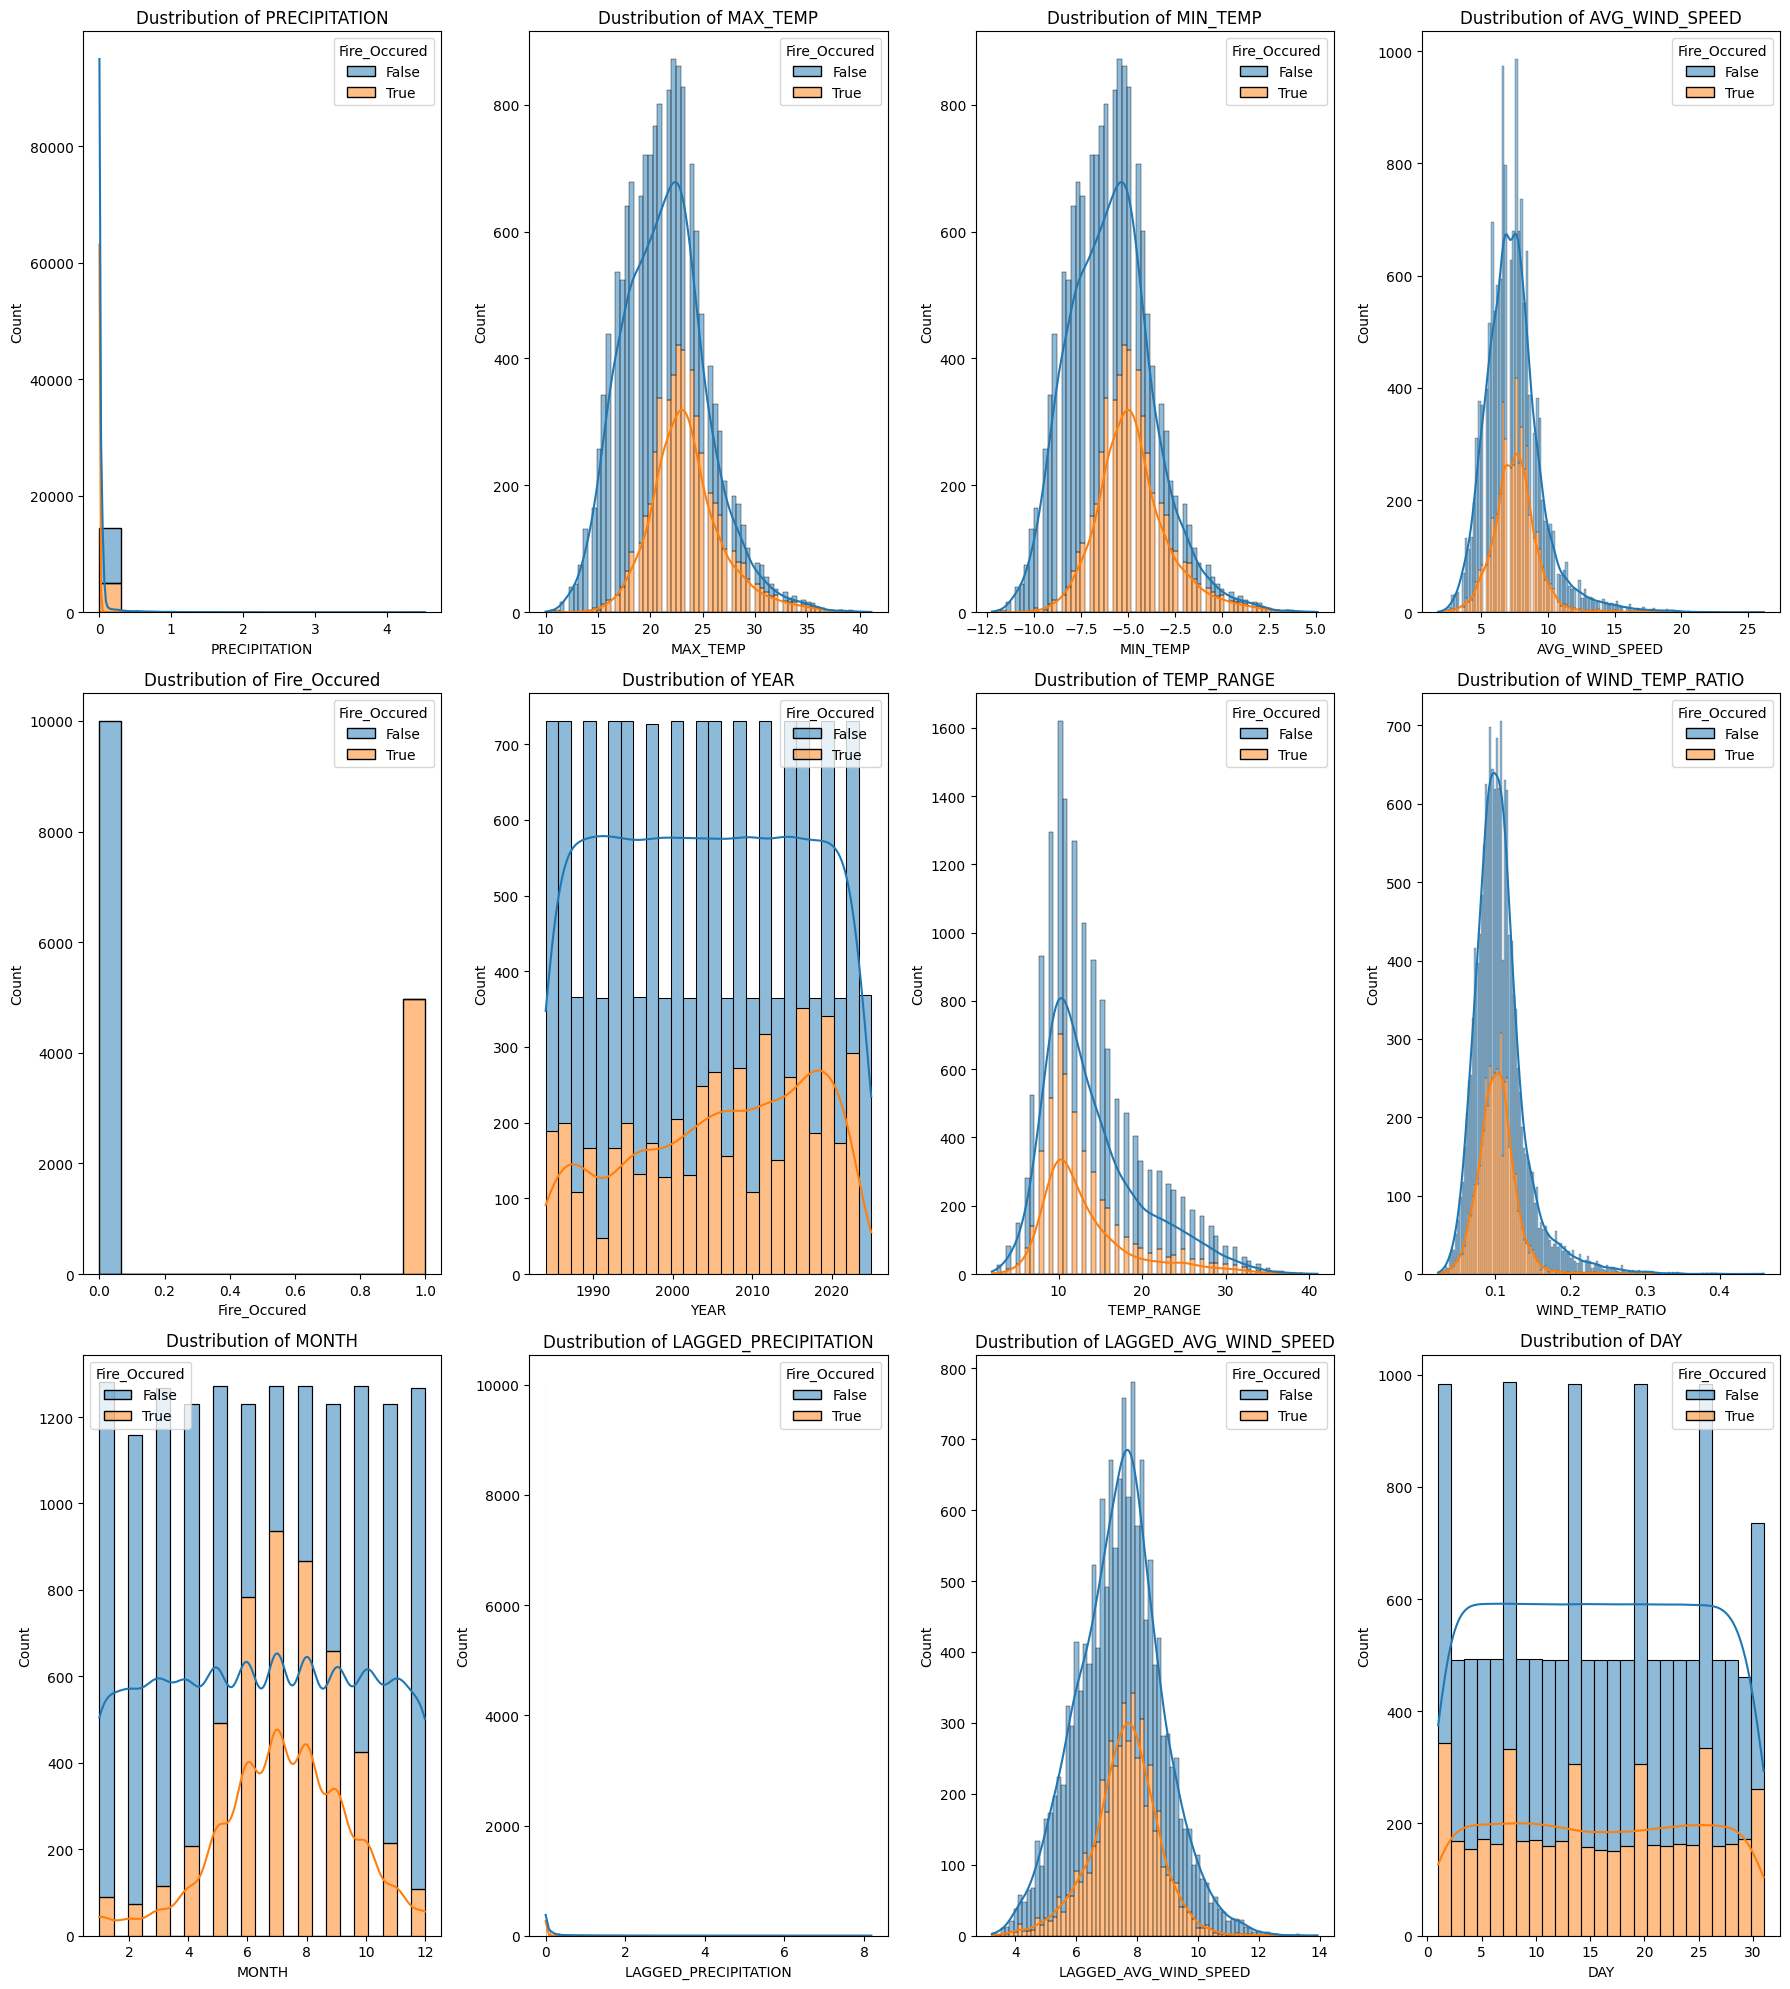

In [31]:
plt.figure(figsize=(18,20))
for i,c in enumerate(num):
    plt.subplot(3,4,i+1)
    sns.histplot(data=df2,x=c,hue='Fire_Occured',kde=True,multiple='stack')
    plt.title(f"Dustribution of {c}")
plt.tight_layout()
plt.show()

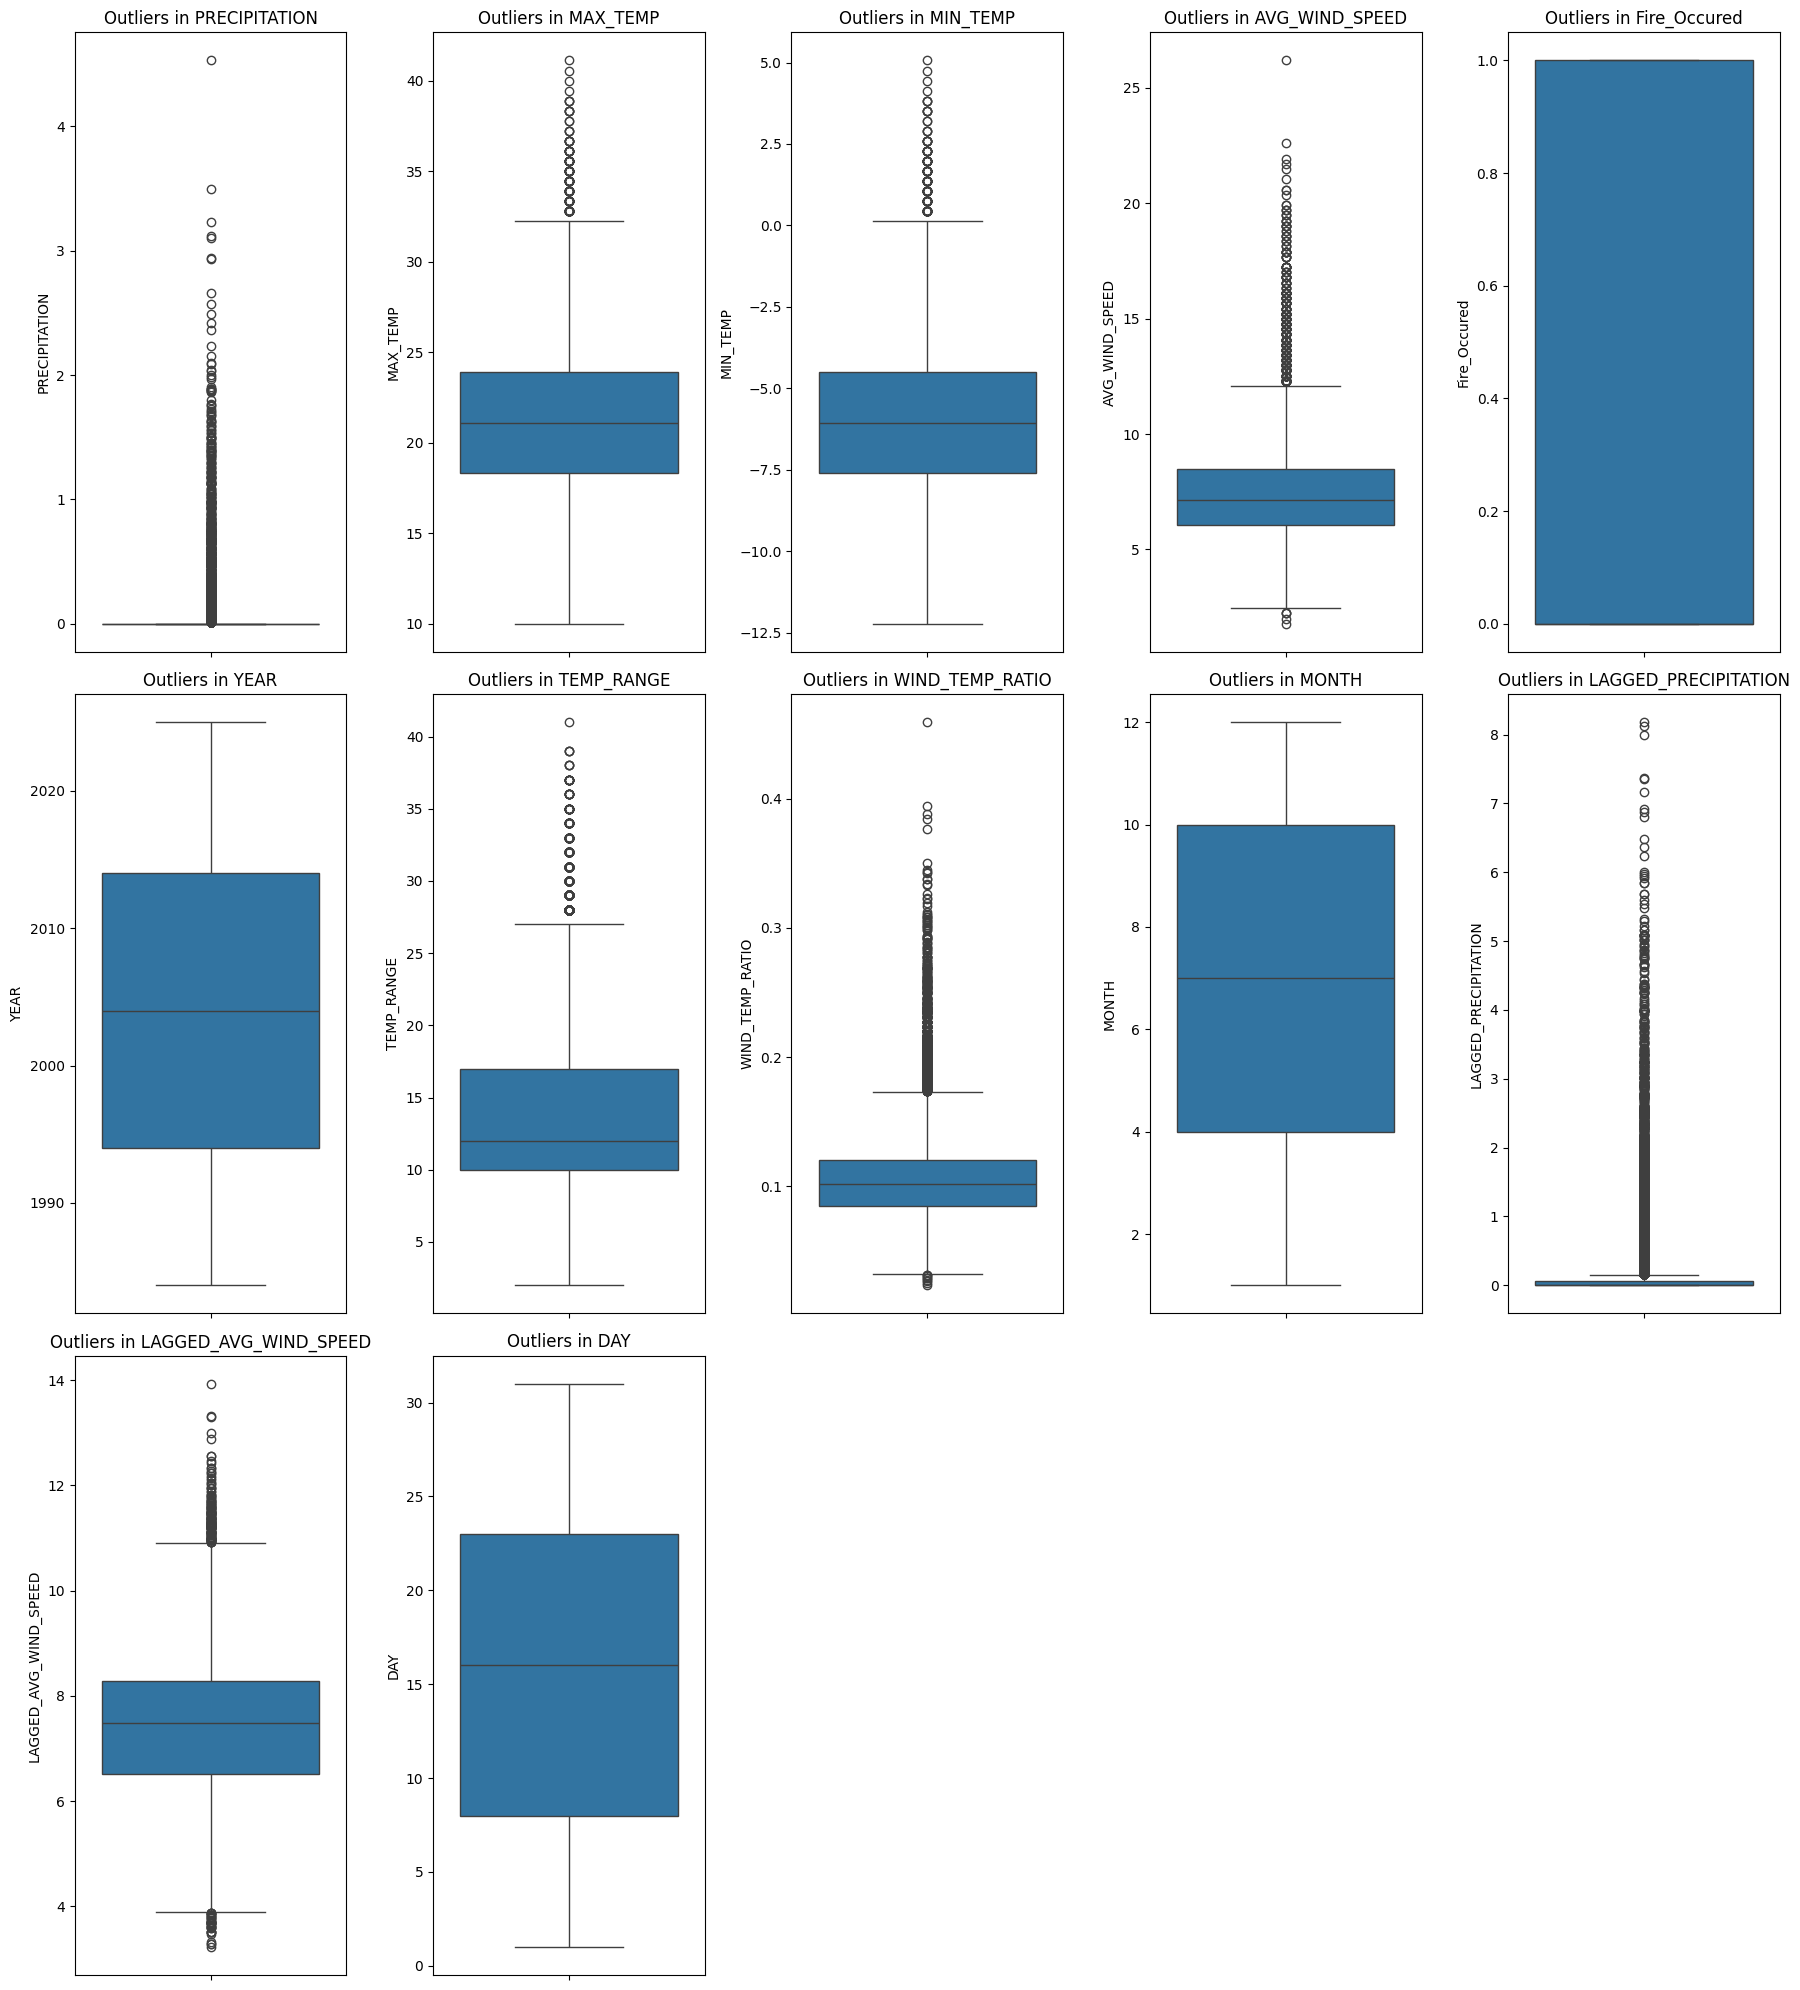

In [32]:
plt.figure(figsize=(18,20))
for i,c in enumerate(num):
    plt.subplot(3,5,i+1)
    sns.boxplot(y=c,data=df2)
    plt.title(f"Outliers in {c}")
plt.tight_layout()
plt.show()